# BBC News NLP Project

In this study, I used the BBC news dataset. The dataset was produced for the shared publication. 

- D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.

There are 5 different categories of news(business, entertainment, politics, sport, tech) and they are consisted of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.

My first goal was identifying G20 countries in the news and answering total count related questions. Secondly, I focused to find themes of each categories by using Latent Dirichlet Allocation (LDA).

In [1]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sbaru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sbaru\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sbaru\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 1) Loading the Dataset

In [3]:
# Reading texts by per folder and relative lengths. 
# They recorded the 'text' list by the category and the body.
# Then converted to a dataframe as 'bbc'

files_list = [['business', 511], ['entertainment', 387], ['politics', 418],
             ['sport', 512], ['tech', 402]]
text = []

for file, length in files_list:
    for i in np.arange(1,10):
        filename = file + '\\00'+str(i)+'.txt'
        with open(filename) as f:
            lines = f.readlines()
            lines = ' '.join([line.strip() for line in lines]) 
            text.append([file, lines])

    for i in np.arange(10,100):
        filename = file + '\\0'+str(i)+'.txt'
        with open(filename) as f:  
            lines = f.readlines()
            lines = ' '.join([line.strip() for line in lines]) 
            text.append([file, lines])

    for i in np.arange(100,length):
        filename = file + '\\'+str(i)+'.txt'
        with open(filename) as f:  
            lines = f.readlines()
            lines = ' '.join([line.strip() for line in lines]) 
            text.append([file, lines])
            
bbc = pd.DataFrame(text, columns=['category', 'text'])
bbc['category'] = pd.Categorical(bbc['category'])

## 2) Preparing the Data

In [4]:
# Resource code:
# Remove punctuation

bbc['text'] = bbc['text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
bbc['text'] = bbc['text'].map(lambda x: re.sub('\n', '', x))
bbc['text'] = bbc['text'].map(lambda x: x.lower())
# Print out the first rows of papers
bbc['text'].head()

0    ad sales boost time warner profit  quarterly p...
1    dollar gains on greenspan speech  the dollar h...
2    yukos unit buyer faces loan claim  the owners ...
3    high fuel prices hit ba's profits  british air...
4    pernod takeover talk lifts domecq  shares in u...
Name: text, dtype: object

## 3) Exploratary Data Analysis

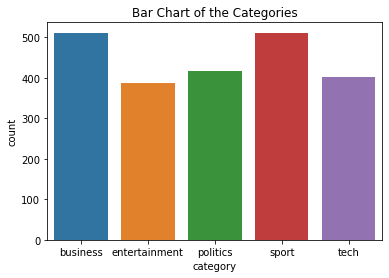

In [5]:
sns.countplot(x=bbc.category)
plt.title('Bar Chart of the Categories');

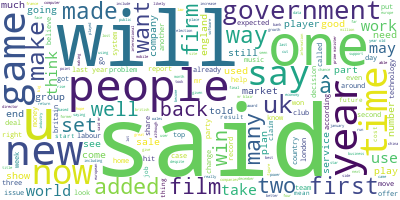

In [6]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(bbc['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Assumptions

After a google search, I learned that G20 includes not only countries but also the European Union. I only added the most common abbreviations for the United Kingdom, the United States of America, and the European Union. Because 'us' is a common word in English I looked for 'the us'. Also, I observe that 'usa' is used frequently and consider it in my keywords. Other than that, I didn't add lots of possible keywords such as countries and states in the unions, nationalities, languages, and cities which are obviously identified by certain countries but I preferred to keep the scope more restricted.

## Part 1

In [7]:
# G20 countries with the most common abbrevations

G_20 = ['argentina', 'australia', 'brazil', 'canada', 'china', 'france', 'germany', 'japan', 
        'india', 'indonesia', 'italy', 'mexico', 'russia', 'south africa', 'saudi arabia', 
        'south korea', 'turkey', 'united kingdom', 'united states', 'european union', 
        'uk', 'eu', 'the us', 'usa']

In [8]:
# Adding columns for every G20 countries respectively their how many they are mentioned in every news
bbc2 = bbc.copy()

for country in G_20:
    f = lambda x: x.text.count(country)
    bbc2[country] = bbc2.apply(f, axis = 'columns')

# The first 10 observations with newly added columns   
bbc2.head().T

,0,1,2,3,4
category,business,business,business,business,business
text,ad sales boost time warner profit quarterly p...,dollar gains on greenspan speech the dollar h...,yukos unit buyer faces loan claim the owners ...,high fuel prices hit ba's profits british air...,pernod takeover talk lifts domecq shares in u...
argentina,0,0,0,0,0
australia,0,0,0,0,0
brazil,0,0,0,0,0
canada,0,0,0,0,0
china,0,2,0,0,0
france,0,0,0,0,1
germany,0,0,0,0,0
japan,0,0,0,0,0


In [9]:
# Combining  the columns which are used for the same monarchy, country, and union

double_columns_countries = [['united kingdom', 'uk'], ['united states', 'the us'], 
                            ['united states', 'usa'], ['european union', 'eu']]

for i, j in double_columns_countries:
    bbc2[i + ' total'] = bbc2[i] + bbc2[j]

In [10]:
# dropping aggregated columns 

bbc2 = bbc2.drop(['united kingdom', 'uk', 'united states', 'the us', 
                'united states', 'usa', 'european union', 'eu'], axis=1)

### Answer 1.1

In [11]:
G_20bbc = bbc2.select_dtypes(include='int64')

bbc2['total_count'] = G_20bbc.apply(lambda x: x.sum(), axis='columns')

print("Total number of news that incleded G20 countries: " + str(bbc2[bbc2['total_count'] > 0].count()['total_count']))

Total number of news that incleded G20 countries: 1506


### Answer 1.2

In [12]:
G_20_boolean = G_20bbc > 0

bbc2['total_countries'] = G_20_boolean.apply(lambda x: x.sum(), axis='columns')

print("Total number of news that incleded several G20 countries: " + 
      str(bbc2[bbc2['total_countries'] > 1].count()['total_countries']))

Total number of news that incleded several G20 countries: 703


## Part 2

In this part, I focused the themes for every main topic of news. I used LDA topic modeling by using similar code that I shared below. You can find 5 different related themes for every section below.

Resource codes: https://github.com/priya-dwivedi/Deep-Learning/blob/master/topic_modeling/LDA_Newsgroup.ipynb 

In [13]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result

In [14]:
category_list = ['business', 'entertainment', 'politics', 'sport', 'tech']
lda_model_list = []
stemmer = SnowballStemmer("english")

for category in category_list:
    processed_docs = []

    for doc in bbc.loc[bbc['category'] == category]['text']:
        processed_docs.append(preprocess(doc))

    dictionary = gensim.corpora.Dictionary(processed_docs)

    '''
    Remove very rare and very common words:

    - words appearing less than 15 times
    - words appearing in more than 10% of all documents
    '''
    dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

    bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics = 5, 
                                       id2word = dictionary,                                    
                                       passes = 10,
                                       workers = 2)

    lda_model_list.append(lda_model)

In [15]:
counter = 0
for category in category_list:
    
    model = lda_model_list[counter]
    for idx, topic in model.print_topics(-1):
        print(category.upper() + ':')
        print("Topic: {} \nWords: {}".format(idx, topic ))
        print("\n")
    
    counter += 1
        

BUSINESS:
Topic: 0 
Words: 0.055*"yuko" + 0.034*"india" + 0.031*"russian" + 0.027*"court" + 0.025*"russia" + 0.020*"gazprom" + 0.016*"rosneft" + 0.016*"bankruptci" + 0.015*"auction" + 0.014*"indian"


BUSINESS:
Topic: 1 
Words: 0.035*"airlin" + 0.023*"insur" + 0.014*"commiss" + 0.012*"investig" + 0.012*"damag" + 0.011*"fuel" + 0.009*"disast" + 0.009*"travel" + 0.008*"affect" + 0.008*"asia"


BUSINESS:
Topic: 2 
Words: 0.019*"deficit" + 0.012*"japan" + 0.011*"worldcom" + 0.010*"index" + 0.010*"telecom" + 0.010*"fraud" + 0.010*"currenc" + 0.009*"elect" + 0.008*"bush" + 0.007*"manufactur"


BUSINESS:
Topic: 3 
Words: 0.019*"retail" + 0.019*"club" + 0.017*"deutsch" + 0.012*"german" + 0.010*"unemploy" + 0.009*"card" + 0.009*"mortgag" + 0.009*"board" + 0.009*"christma" + 0.009*"takeov"


BUSINESS:
Topic: 4 
Words: 0.013*"list" + 0.011*"project" + 0.009*"contract" + 0.009*"brand" + 0.008*"worker" + 0.008*"maker" + 0.008*"stake" + 0.007*"factori" + 0.007*"centr" + 0.007*"propos"


ENTERTAINMEN